### Logistic Regression 

## without inbuilt function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression as logr
from sklearn.metrics import accuracy_score

In [77]:
dataset = pd.read_csv('suv_data.csv')
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [78]:
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [79]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

In [80]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow in exp
    return 1 / (1 + np.exp(-z))

In [81]:
m, n = X_train.shape
w,b = np.zeros(n), 0  # Initialize weight and bias
learning_rate = 0.001  # learning rate
epochs = 1000

In [98]:
for epoch in range(epochs):
    # Compute the linear combination wx + b
    linear_model = np.dot(X_train, w) + b
    
    # Apply the sigmoid function to get y_pred
    y_pred = sigmoid(linear_model)
    
    # Clip y_pred to avoid log(0)
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Compute the binary cross-entropy loss
    loss = -(1/m) * np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
    
    # Compute gradients
    dw = (1/m) * np.dot(X_train.T, (y_pred - y_train))  # Gradient w.r.t. weights
    db = (1/m) * np.sum(y_pred - y_train)  # Gradient w.r.t. bias
    
    # Gradient clipping (to avoid large gradients)
    dw = np.clip(dw, -5, 5)
    db = np.clip(db, -5, 5)
    
    # weights and bias
    w -= learning_rate * dw
    b -= learning_rate * db
    if epoch%100==0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 0.5916352966433059
Epoch 100, Loss: 0.5841556132132913
Epoch 200, Loss: 0.5770490108803806
Epoch 300, Loss: 0.5702925991576792
Epoch 400, Loss: 0.5638649580719964
Epoch 500, Loss: 0.5577460640793949
Epoch 600, Loss: 0.5519172139618004
Epoch 700, Loss: 0.5463609483168471
Epoch 800, Loss: 0.5410609758918848
Epoch 900, Loss: 0.5360020997083788


In [83]:
y_pred_test = sigmoid(np.dot(X_test, w) + b)
y_pred_test_binary = [1 if i > 0.5 else 0 for i in y_pred_test]

In [84]:
print(f'Final values - w: {w}, b: {b}')

Final values - w: [0.24615782 0.15743592], b: -0.12459715765926974


In [85]:
accuracy = np.mean(y_pred_test_binary == y_test)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 86.25%


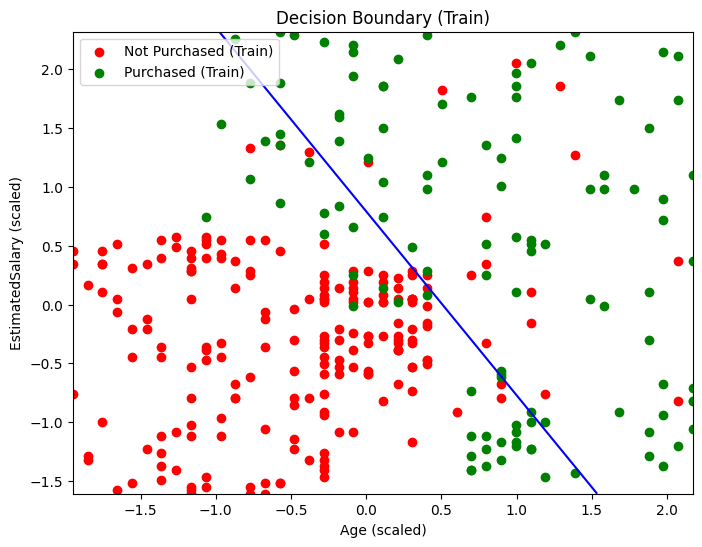

In [86]:
# Plot for the training data
plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Not Purchased (Train)')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='green', label='Purchased (Train)')

# Create a meshgrid for the decision boundary
x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
xx, yy = np.meshgrid(x_values, y_values)

# Compute the linear model values for the grid points (for the decision boundary)
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

# Plot the decision boundary (contour where Z=0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='blue')

# Add labels, legends and title
plt.title('Decision Boundary (Train)')
plt.xlabel('Age (scaled)')
plt.ylabel('EstimatedSalary (scaled)')
plt.legend()
plt.show()

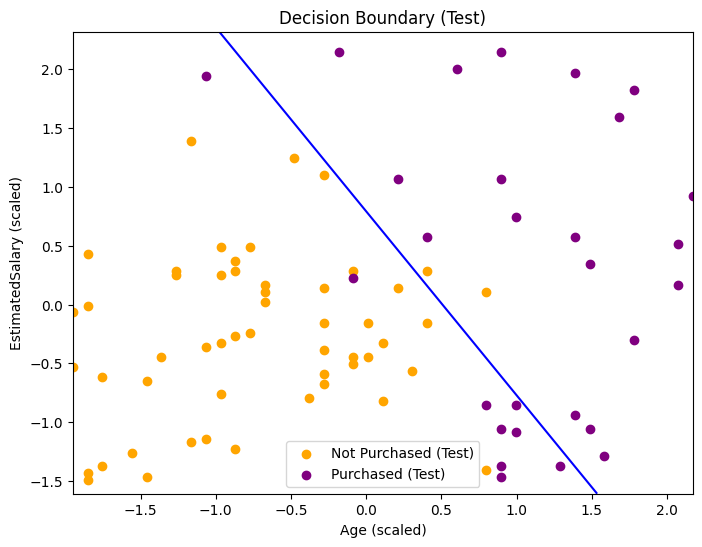

In [87]:
# Plot for the testing data
plt.figure(figsize=(8,6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='orange', label='Not Purchased (Test)')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='purple', label='Purchased (Test)')

# Use the same decision boundary (since it's learned from the training set)
# Reuse the same meshgrid and Z as above
plt.contour(xx, yy, Z, levels=[0.5], colors='blue')

# Add labels, legends and title
plt.title('Decision Boundary (Test)')
plt.xlabel('Age (scaled)')
plt.ylabel('EstimatedSalary (scaled)')
plt.legend()
plt.show()

# with inbuilt function

In [94]:
log_reg = logr()

In [95]:
log_reg.fit(X_train,y_train)
pred=log_reg.predict(X_test)

In [96]:
accuracy_score(y_test,pred)

0.8625

In [2]:
df = pd.read_csv('suv_data.csv')

df['Gender'] = df['Gender'].map({
    "Male": 1,
    "Female": 0
})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0
